# Recortes para os anos de 2008 a 2012
## Países da União Europeia e América Anglo-Saxônica

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import openpyxl

import netpixi
import cpnet

from graph_tool import spectral, centrality
from netpixi.integration.gt import *
from netpixi.integration.gt import Graph
from regression.integration.gt import *

In [104]:
data = pd.read_excel('./final_db.xlsx')
data

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


,Unnamed: 0.1,Unnamed: 0,country,idh_2000,idh_2001,idh_2002,idh_2003,idh_2004,idh_2005,idh_2006,...,rejected,betweenness,pop_cont,coreness,in_degree,out_degree,open,coreness_discreto,idh_2008_2012,idh_2001_2003
0,0,0,"China, Hong Kong SAR",0.830,0.838,0.845,0.854,0.865,0.874,0.886,...,7767,2.861034e-04,0,0.240278,830,16,9.654531,0,0.9050,0.845667
1,1,1,"China, Macao SAR",0.922,0.922,0.922,0.922,0.922,0.922,0.922,...,7,8.704008e-07,0,0.098611,10,3,58.823529,0,0.9220,0.922000
2,2,2,Afghanistan,0.350,0.353,0.384,0.393,0.409,0.418,0.429,...,243,2.351135e-03,0,0.120833,249,239198,50.609756,0,0.4690,0.376667
3,3,3,Albania,0.671,0.678,0.684,0.691,0.696,0.706,0.713,...,64,1.306107e-03,0,0.218056,158,14660,71.171171,0,0.7490,0.684333
4,4,4,Algeria,0.637,0.647,0.657,0.667,0.677,0.685,0.690,...,5511,5.926680e-03,0,0.222222,404,6174,6.830093,0,0.7180,0.657000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,220,Wallis and Futuna Islands,0.763,0.763,0.763,0.763,0.763,0.763,0.763,...,0,0.000000e+00,0,0.045833,0,0,0.000000,0,0.7630,0.763000
221,221,221,Western Sahara,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0.000000e+00,0,0.004167,0,473,0.000000,0,0.0000,0.000000
222,222,222,Yemen,0.444,0.453,0.461,0.470,0.477,0.483,0.488,...,5730,5.728203e-03,0,0.194444,11977,10037,67.639916,0,0.5026,0.461333
223,223,223,Zambia,0.425,0.432,0.441,0.451,0.460,0.471,0.482,...,2454,9.805704e-04,0,0.166667,8280,295,77.138066,0,0.5260,0.441333


In [105]:
paises_eu_america =  pd.read_csv('./eu_america.csv')
lista_paises_eu_america = paises_eu_america['EU_North_America'].to_list()
lista_paises_eu_america

['Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Czech Rep.',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United States of America']

In [7]:
df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')
df_completo

/tmp/ipykernel_12/1764240694.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,United States of America,Zimbabwe,G / IN,232,NaN,229,16,NaN,*,10,28,435,NaN
129716,2016,United States of America,Zimbabwe,G / EO,142,NaN,12,*,NaN,*,23,31,138,NaN
129717,2016,South Africa,Zimbabwe,G / AR,94,9,NaN,NaN,NaN,NaN,94,94,0,NaN
129718,2016,South Africa,Zimbabwe,G / FI,41238,4124,7964,73,NaN,7869,NaN,7942,41260,NaN


In [106]:
df_aresta = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_aresta = df_aresta.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [107]:
df_aresta.value = pd.to_numeric(df_aresta['value'], errors = 'coerce').fillna(0)
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


In [108]:
df_rec_1 = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_rec_1 = df_rec_1.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_rec_1

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [109]:
df_rec_1.value = pd.to_numeric(df_rec_1['value'], errors = 'coerce').fillna(0)
df_rec_1

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


2008 - 2012 e países da UE e da América anglo-saxônica

In [110]:
df_2008_2012 = df_rec_1[((df_rec_1['year'] == 2008) | (df_rec_1['year'] == 2009) | (df_rec_1['year'] == 2010) | 
                   (df_rec_1['year'] == 2011) | (df_rec_1['year'] == 2012))]
df_2008_2012 = df_2008_2012.drop('year', axis=1)
df_2008_2012.value = df_2008_2012['value'].astype(int)
df_2008_2012.rejected = df_2008_2012['rejected'].astype(int)
df_2008_2012 = df_2008_2012[df_2008_2012['origin'] != df_2008_2012['destiny']]
df_2008_2012 = df_2008_2012.groupby(['origin', 'destiny']).sum().reset_index()
df_2008_2012

,origin,destiny,value,rejected
0,Afghanistan,Albania,0,0
1,Afghanistan,Algeria,2,0
2,Afghanistan,Argentina,1,0
3,Afghanistan,Armenia,0,0
4,Afghanistan,Australia,5990,1542
...,...,...,...,...
7940,Zimbabwe,Ukraine,2,4
7941,Zimbabwe,United Kingdom,6505,14829
7942,Zimbabwe,United States of America,643,344
7943,Zimbabwe,Uruguay,1,0


In [111]:
df_2008_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    7945 non-null   object
 1   destiny   7945 non-null   object
 2   value     7945 non-null   int64 
 3   rejected  7945 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 248.4+ KB


In [112]:
listaVertices = []

listaVertices = set(df_completo['Country / territory of asylum/residence'].unique().tolist() + df_completo['Origin'].unique().tolist())

print(len(listaVertices))

225



## Hipótese 3: Localização tem relação com intermediação

### G : BW: GEO

#### Explicação:

Essa hipótese correlaciona o fato de possuir um alto betweenness (intermediação) com o número de países que fazem fronteira com o país em questão. Sendo assim, essa hipótese diz que quanto mais próximo de outros países é uma nação, ou seja, quanto maior o número de países com os qual faz fronteira, maior é o seu betweenness, indicando uma possibilidade de, por ser um país que faz divisa entre diversos outros, ele pode possuir um betweenness alto já que diversas pessoas iriam passar por ele para ir para outros países. 

#### Recorte: 2008 a 2012 e países da União Europeia (UE) e da América Anglo-saxônica

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na entrada e saída de pessoas nos países da UE e América Anglo-Saxônica, o que deixaria de corroborar com a hipótese 3, já que, com isso, a abertura desses países foi restringida e, consequentemente, limitando oa cesso a estes.

In [123]:
df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_2008_2012_out.sort_values("value", ascending = False)

/tmp/ipykernel_12/2163053283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value,rejected
origin,,
Eritrea,107682.0,15104.0
Myanmar,107568.0,10132.0
Dem. Rep. of the Congo,77502.0,47213.0
Iraq,71266.0,70812.0
Somalia,70458.0,31256.0
...,...,...
Tuvalu,0.0,1.0
Bermuda,0.0,1.0
Norfolk Island,0.0,0.0


In [124]:
# Criando um grafo não-dirigido
g3 = Graph(directed=True) 
g3.add_vp('nome')
g3.add_ep('aceitos')

In [125]:
for vertice in listaVertices:
    g3.add_vertex(vertice)

In [126]:
for v in g3.all_vertices():
    v['nome'] = str(v)

In [127]:
n2 = g3.num_vertices()
print('O número de vértices do grafo é :', n2)

O número de vértices do grafo é : 225


In [129]:
for index, row in df_2008_2012.iterrows():
    g3.add_edge(row.origin, row.destiny)
    g3.get_edge(row.origin, row.destiny)['aceitos'] = row.value

In [130]:
gt_save(g3, '/grafo_2008_2012.net.gz')

In [131]:
g3 =  gt_load('/grafo_2008_2012.net.gz')

In [132]:
m = gt_draw.sfdp_layout(g3)
gt_move(g3, m)
gt_save(g3, 'grafo_2008_2012.net.gz')

In [133]:
r3 = netpixi.render('grafo_2008_2012.net.gz', infinite=True);

In [134]:
r3.vertex_set_key('nome')

r3.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r3.edge_default(color=0x20B2AA)

r3.edge_scale('aceitos', 1, 10)

In [135]:
bc_completo, _ = centrality.betweenness(g3)
g3.add_vp('betweenness', bc_completo)

In [136]:
df_betweenness_2008_2012 = gt_data(g3).sort_values("betweenness", ascending = False)
df_betweenness_2008_2012

,nome,betweenness
id,,
United States of America,United States of America,0.129169
Syrian Arab Rep.,Syrian Arab Rep.,0.062048
South Africa,South Africa,0.036638
Cuba,Cuba,0.033585
Canada,Canada,0.030156
...,...,...
Wallis and Futuna Islands,Wallis and Futuna Islands,0.000000
Marshall Islands,Marshall Islands,0.000000
Svalbard and Jan Mayen,Svalbard and Jan Mayen,0.000000


In [137]:
m = gt_draw.sfdp_layout(g3)
gt_move(g3, m)
gt_save(g3, 'centralidadeBetweeness20082012.net.gz')

In [138]:
r3.vertex_scale('betweenness', 5, 25)

In [139]:
r3 = netpixi.render('centralidadeBetweeness20082012.net.gz', infinite=True);

In [140]:
r3.edge_scale('aceitos', 1, 10)

r3.vertex_set_key('nome')

r3.vertex_scale('betweenness', 5, 25)

In [141]:
data_2008_2012_geo = data.loc[:, ['country', 'n_neightbours']]
data_2008_2012_geo

,country,n_neightbours
0,"China, Hong Kong SAR",1
1,"China, Macao SAR",1
2,Afghanistan,6
3,Albania,4
4,Algeria,7
...,...,...
220,Wallis and Futuna Islands,0
221,Western Sahara,3
222,Yemen,2
223,Zambia,8


In [142]:
data_2008_2012_geo = data_2008_2012_geo.rename(columns={'country': 'origin'})
df_betweenness_2008_2012 = df_betweenness_2008_2012.rename(columns={'nome':'origin'})
df_betweenness_2008_2012

,origin,betweenness
id,,
United States of America,United States of America,0.129169
Syrian Arab Rep.,Syrian Arab Rep.,0.062048
South Africa,South Africa,0.036638
Cuba,Cuba,0.033585
Canada,Canada,0.030156
...,...,...
Wallis and Futuna Islands,Wallis and Futuna Islands,0.000000
Marshall Islands,Marshall Islands,0.000000
Svalbard and Jan Mayen,Svalbard and Jan Mayen,0.000000


In [143]:
df_betweenness_2008_2012 = df_betweenness_2008_2012.merge(data_2008_2012_geo, on="origin", how="left")
df_filtrado_bw_geo_2008_2012 = df_betweenness_2008_2012[(df_betweenness_2008_2012['origin'].isin(lista_paises_eu_america))]
df_filtrado_bw_geo_2008_2012

,origin,betweenness,n_neightbours
0,United States of America,0.129169,2
4,Canada,0.030156,1
8,France,0.020260,8
14,Belgium,0.016598,4
15,Germany,0.015891,9
34,Greece,0.006709,4
40,Netherlands,0.005977,2
41,Romania,0.005909,5
42,Italy,0.005645,6
45,Denmark,0.005308,1


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_bw_geo_2008_2012, correlacionando o valor do betweenness com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (betweenness) é um valor contínuo (métrica).

In [144]:
result_hip3 = reg.linear(data=df_filtrado_bw_geo_2008_2012, formula='betweenness ~ n_neightbours')
result_hip3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.2170
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.645
Time:                        05:39:18   Log-Likelihood:                 64.655
No. Observations:                  28   AIC:                            -125.3
Df Residuals:                      26   BIC:                            -122.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0127      0.009      1.459      0.157      -0.005       0.031
n_neightbours    -0.0009      0.002     -0.466      0.645      -0.005       0.003
==============================================================================
Omnibus:                       59.460   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.433
Skew:                           4.240   Prob(JB):                    2.84e-100
Kurtosis:                      20.918   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
result_hip3.nano_summary()

-0.001 (0.002)


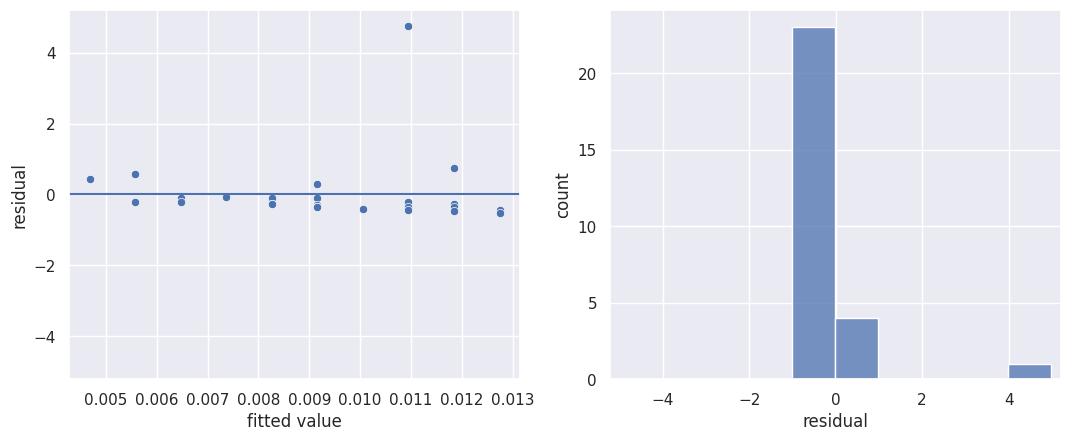

In [146]:
result_hip3.plot_residuals()


## Hipóteses 4: Desenvolvimento tem relação com vazão de pessoas

### C : EXT: DSV, CORE, CONP


#### Explicação:

Essa hipótese correlaciona o desenvolvimento socioeconômico do país (medido pelo IDH) com a vazão de pessoas. Ou seja, quanto menor for o desenvolvimento de uma nação, maior é a sua saída de pessoas, uma vez que, visando melhores condições de vida ou a própria sobrevivência, pessoas podem sair de um país, devido ao seu baixo desenvolvimento, em maior quantidade do que em países com um IDH alto. Além disso, a saída de pessoas também está correlacionada com o coreness e a contenção populacional (variáveis de controle), uma vez que quanto maior a vazão de pessoas, mais ao centro esse país está e menor é a sua contenção populacional.

#### Recorte: 2008 a 2012 e países da União Europeia (UE) e da América Anglo-saxônica

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na vazão de pessoas em países com IDH alto, o que deixaria de corroborar com a hipótese 4.

In [147]:
df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_2008_2012_out.sort_values("value", ascending = False)

/tmp/ipykernel_12/2163053283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value,rejected
origin,,
Eritrea,107682.0,15104.0
Myanmar,107568.0,10132.0
Dem. Rep. of the Congo,77502.0,47213.0
Iraq,71266.0,70812.0
Somalia,70458.0,31256.0
...,...,...
Tuvalu,0.0,1.0
Bermuda,0.0,1.0
Norfolk Island,0.0,0.0


In [148]:
g2 = gt_load('/grafo_2008_2012.net.gz')

In [149]:
m = gt_draw.sfdp_layout(g2)
gt_move(g2, m)
gt_save(g2, 'grafo_2008_2012.net.gz')

In [150]:
r2 = netpixi.render('grafo_2008_2012.net.gz', infinite=True);

In [152]:
r2.vertex_set_key('nome')

r2.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x20B2AA)

In [153]:
r2.edge_scale('aceitos', 1, 10)

In [154]:
g2 =  gt_load('/grafo_2008_2012.net.gz')

In [155]:
m = gt_draw.sfdp_layout(g2)
gt_move(g2, m)
gt_save(g2, 'centralidadeCoreness20082012.net.gz')

In [156]:
r2 = netpixi.render('centralidadeCoreness20082012.net.gz')

In [157]:
matrix = spectral.adjacency(g2)

# # Além de cpnet.Surprise, há outras
# # opções de algoritmos discretos:
# # cpnet.BE
# # cpnet.Lip
# # cpnet.LapCore
# # cpnet.LapSgnCore
# # cpnet.LowRankCore

algorithm = cpnet.BE()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# # Depois do código acima, c é um dicionário
# # em que as chaves são índices de vértices e
# # valores são os atribuídos pelo algoritmo.

g2.add_vp('coreness')
for i, coreness in c.items():
    v = g2.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
# # Vamos pintar de vermelho todos os vértices
# # identificados como centro e de verde todos
# # os vértices identificados como periferia.
    
for v in g2.all_vertices():
    if v['coreness'] == 1:
        r2.vertex(v['id'], color=0xff0000)
    else:
        r2.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

In [158]:
r2.edge_scale('aceitos', 1, 10)

r2.vertex_set_key('nome')

r2.vertex_scale('coreness', 5, 25)

In [159]:
df_coreness_2008_2012 = gt_data(g2).sort_values("coreness", ascending = False)
df_coreness_2008_2012

,nome,coreness
id,,
Denmark,Denmark,1
Ecuador,Ecuador,1
Spain,Spain,1
Sweden,Sweden,1
Switzerland,Switzerland,1
...,...,...
United Rep. of Tanzania,United Rep. of Tanzania,0
Svalbard and Jan Mayen,Svalbard and Jan Mayen,0
Russian Federation,Russian Federation,0


In [160]:
r2.vertex_set_key('nome')

r2.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x20B2AA)

In [161]:
r2.edge_scale('aceitos', 1, 10)

In [162]:
data_idh_2008_2012 = data.loc[:, ['idh_2008_2012', 'country', 'pop_cont']]

data_idh_2008_2012 = data_idh_2008_2012.rename(columns={'idh_2008_2012': 'idh_2008_2012', 'country': 'origin'})
df_coreness_2008_2012 = df_coreness_2008_2012.rename(columns={'nome':'origin'})

df_coreness_2008_2012

,origin,coreness
id,,
Denmark,Denmark,1
Ecuador,Ecuador,1
Spain,Spain,1
Sweden,Sweden,1
Switzerland,Switzerland,1
...,...,...
United Rep. of Tanzania,United Rep. of Tanzania,0
Svalbard and Jan Mayen,Svalbard and Jan Mayen,0
Russian Federation,Russian Federation,0


In [163]:
df_intermediario = df_coreness_2008_2012.merge(data_idh_2008_2012, on="origin", how="left")
df_intermediario = df_intermediario.merge(df_2008_2012_out, on="origin", how="left")
df_intermediario

,origin,coreness,idh_2008_2012,pop_cont,value,rejected
0,Denmark,1,0.9218,0,0.0,22.0
1,Ecuador,1,0.7290,0,163.0,631.0
2,Spain,1,0.8718,0,16.0,147.0
3,Sweden,1,0.9098,0,9.0,37.0
4,Switzerland,1,0.9372,0,2.0,20.0
...,...,...,...,...,...,...
220,United Rep. of Tanzania,0,0.4806,0,225.0,2659.0
221,Svalbard and Jan Mayen,0,0.0000,0,0.0,0.0
222,Russian Federation,0,0.7834,1,20428.0,60294.0
223,Lebanon,0,0.7628,1,1068.0,7442.0


In [164]:
df_filtrado_idh_2008_2012 = df_intermediario[(df_intermediario['origin'].isin(lista_paises_eu_america))]
df_filtrado_idh_2008_2012

,origin,coreness,idh_2008_2012,pop_cont,value,rejected
0,Denmark,1,0.9218,0,0.0,22.0
2,Spain,1,0.8718,0,16.0,147.0
3,Sweden,1,0.9098,0,9.0,37.0
5,United States of America,1,0.9156,0,50.0,2765.0
7,Greece,1,0.8648,0,10.0,96.0
8,Italy,1,0.8792,0,19.0,147.0
10,Belgium,1,0.9094,0,31.0,47.0
11,Canada,1,0.9012,0,38.0,110.0
12,Finland,1,0.9172,0,4.0,5.0
13,Ireland,1,0.9056,0,1.0,24.0


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_idh_2008_2012, correlacionando o valor da saída de pessoas com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (value) é um valor contínuo.

In [168]:
result_hip4 = reg.linear(data=df_filtrado_idh_2008_2012, formula='np.log1p(value) ~ idh_2008_2012 + coreness + pop_cont')
result_hip4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log1p(value)   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     4.982
Date:                Sun, 20 Nov 2022   Prob (F-statistic):            0.00793
Time:                        05:41:01   Log-Likelihood:                -50.207
No. Observations:                  28   AIC:                             108.4
Df Residuals:                      24   BIC:                             113.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        34.5542     10.496      3.292      0.003      12.891      56.217
idh_2008_2012   -37.0481     12.478     -2.969      0.007     -62.802     -11.294
coreness          1.2169      0.976      1.247      0.224      -0.797       3.231
pop_cont          3.3322      1.669      1.996      0.057      -0.113       6.777
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.482
Skew:                          -0.012   Prob(JB):                        0.786
Kurtosis:                       2.358   Cond. No.                         78.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
result_hip4.nano_summary()

-37.048 (12.478) ***
+01.217 (0.976)
+03.332 (1.669) *


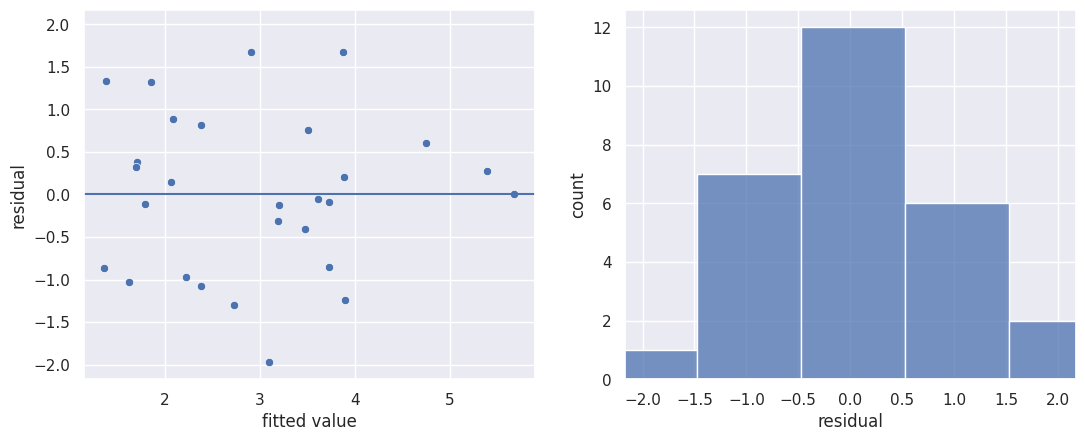

In [170]:
result_hip4.plot_residuals()


## Hipóteses 5: Abertura tem relação com chegada de pessoas

### H : IN: OPEN, EXT, CORE

#### Explicação:

Essa hipótese correlaciona a abertura de um país com a entrada de pessoas. Ou seja, quanto maior for a abertura de um país, mais pessoas chegam até ele. Ou seja, quanto mais fácil for de entrar nas fronteiras de uma nação, maior será o número de pessoas capazes de buscar refúgio nesses países. Além disso, a chegada de pessoas também está relacionada com a saída de pessoas e o coreness (variáveis de controle), uma vez que quanto maior a saída de pessoas de um país, mais pessoas chegarão em outros países, além de que quanto maior a entrada de pessoas, maior é o seu coreness. 


#### Recorte: 2008 a 2012 e países da União Europeia e América Anglo-Saxônica

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na abertura de países que foram mais afetados geopoliticamente com essas crises, como foram os casos de países da Europa e da América do Norte, chegando a uma menor abertura desses países, já que houve uma maior restrição na entrada de pessoas por conta do aumento do risco de contaminação da H1N1 e por também não estarem em condições financeiras favoráveis a entrada de ainda mais pessoas em seu território.

In [171]:
df_indegree_2008_2012 = df_2008_2012.groupby('destiny').sum().reindex(listaVertices).fillna(0)
df_indegree_2008_2012 = df_indegree_2008_2012.sort_values("value", ascending = False)
df_indegree_2008_2012 = df_indegree_2008_2012.reset_index()
df_indegree_2008_2012 = df_indegree_2008_2012.rename(columns={'destiny': 'country', 'value':'in_degree'})
df_indegree_2008_2012

/tmp/ipykernel_12/3610552243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_indegree_2008_2012 = df_2008_2012.groupby('destiny').sum().reindex(listaVertices).fillna(0)


,country,in_degree,rejected
0,United States of America,104356.0,74546.0
1,Malaysia,93752.0,4685.0
2,France,54791.0,267437.0
3,Canada,54290.0,60789.0
4,Sudan,51213.0,845.0
...,...,...,...
220,Wallis and Futuna Islands,0.0,0.0
221,Marshall Islands,0.0,0.0
222,Svalbard and Jan Mayen,0.0,0.0
223,Stateless,0.0,0.0


In [172]:
df_intermediario = df_intermediario.drop('rejected', axis=1)
df_intermediario = df_intermediario.rename(columns={'origin': 'country', 'value':'out_degree'})
df_intermediario = df_intermediario.merge(df_indegree_2008_2012, on="country", how="left")
df_intermediario

,country,coreness,idh_2008_2012,pop_cont,out_degree,in_degree,rejected
0,Denmark,1,0.9218,0,0.0,3685.0,10179.0
1,Ecuador,1,0.7290,0,163.0,31987.0,38839.0
2,Spain,1,0.8718,0,16.0,1137.0,11965.0
3,Sweden,1,0.9098,0,9.0,13548.0,139848.0
4,Switzerland,1,0.9372,0,2.0,14535.0,18415.0
...,...,...,...,...,...,...,...
220,United Rep. of Tanzania,0,0.4806,0,225.0,162.0,27.0
221,Svalbard and Jan Mayen,0,0.0000,0,0.0,0.0,0.0
222,Russian Federation,0,0.7834,1,20428.0,2182.0,13537.0
223,Lebanon,0,0.7628,1,1068.0,1331.0,2119.0


In [173]:
df_2008_2012_inout = df_intermediario.drop(['pop_cont','idh_2008_2012'], axis=1)
df_2008_2012_inout['open'] = (df_2008_2012_inout['in_degree']/(df_2008_2012_inout['in_degree'] + df_2008_2012_inout['rejected']))*100
df_2008_2012_inout['open'] = df_2008_2012_inout['open'].fillna(0)
df_2008_2012_inout

,country,coreness,out_degree,in_degree,rejected,open
0,Denmark,1,0.0,3685.0,10179.0,26.579631
1,Ecuador,1,163.0,31987.0,38839.0,45.162793
2,Spain,1,16.0,1137.0,11965.0,8.678064
3,Sweden,1,9.0,13548.0,139848.0,8.832043
4,Switzerland,1,2.0,14535.0,18415.0,44.112291
...,...,...,...,...,...,...
220,United Rep. of Tanzania,0,225.0,162.0,27.0,85.714286
221,Svalbard and Jan Mayen,0,0.0,0.0,0.0,0.000000
222,Russian Federation,0,20428.0,2182.0,13537.0,13.881290
223,Lebanon,0,1068.0,1331.0,2119.0,38.579710


In [174]:
df_2008_2012_inout_eu_america =  df_2008_2012_inout[(df_2008_2012_inout['country'].isin(lista_paises_eu_america))]
df_2008_2012_inout_eu_america

,country,coreness,out_degree,in_degree,rejected,open
0,Denmark,1,0.0,3685.0,10179.0,26.579631
2,Spain,1,16.0,1137.0,11965.0,8.678064
3,Sweden,1,9.0,13548.0,139848.0,8.832043
5,United States of America,1,50.0,104356.0,74546.0,58.331377
7,Greece,1,10.0,905.0,63158.0,1.412672
8,Italy,1,19.0,9352.0,60698.0,13.350464
10,Belgium,1,31.0,16714.0,91631.0,15.426646
11,Canada,1,38.0,54290.0,60789.0,47.176288
12,Finland,1,4.0,1105.0,3525.0,23.866091
13,Ireland,1,1.0,1348.0,20082.0,6.290247


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_2008_2012_inout_eu_america, correlacionando o valor do in_degree com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (in_degree) é um valor contínuo (métrica).

In [178]:
result_hip5 = reg.linear(data=df_2008_2012_inout_eu_america, formula='np.log1p(in_degree) ~ open + coreness + out_degree')
result_hip5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(in_degree)   R-squared:                       0.722
Model:                             OLS   Adj. R-squared:                  0.687
Method:                  Least Squares   F-statistic:                     20.74
Date:                 Sun, 20 Nov 2022   Prob (F-statistic):           7.52e-07
Time:                         05:42:21   Log-Likelihood:                -46.129
No. Observations:                   28   AIC:                             100.3
Df Residuals:                       24   BIC:                             105.6
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3242      0.526      8.226      0.000       3.239       5.409
open           0.0483      0.020      2.402      0.024       0.007       0.090
coreness       3.6927      0.596      6.200      0.000       2.464       4.922
out_degree     0.0019      0.002      1.001      0.327      -0.002       0.006
==============================================================================
Omnibus:                        3.944   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.739
Skew:                          -0.243   Prob(JB):                        0.419
Kurtosis:                       1.880   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
result_hip5.nano_summary()

+0.048 (0.020) **
+3.693 (0.596) ***
+0.002 (0.002)


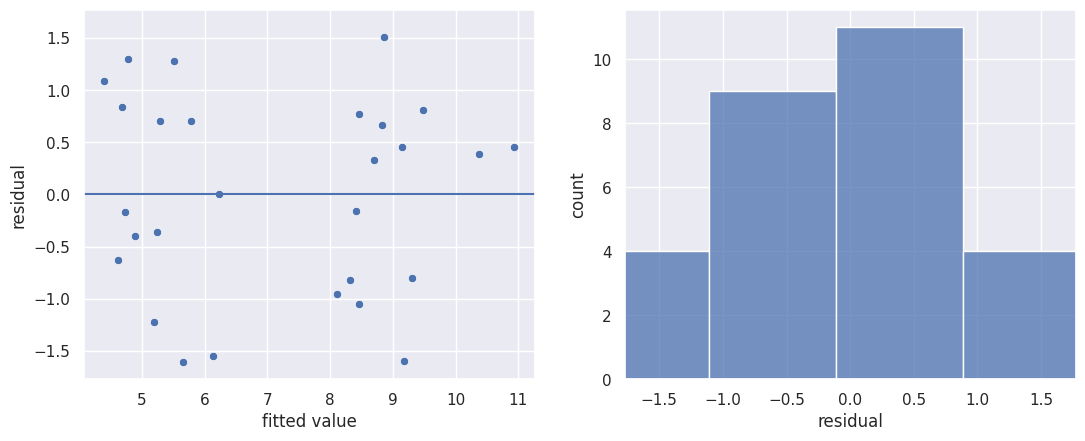

In [180]:
result_hip5.plot_residuals()


# Países da União Europeia e América Anglo-Saxônica

## Sem recortes de ano

-------------------------------------------------------------------------------------------------------------------------------


## Hipótese 3: Localização tem relação com intermediação

### G : BW: GEO

#### Explicação:

Essa hipótese correlaciona o fato de possuir um alto betweenness (intermediação) com o número de países que fazem fronteira com o país em questão. Sendo assim, essa hipótese diz que quanto mais próximo de outros países é uma nação, ou seja, quanto maior o número de países com os qual faz fronteira, maior é o seu betweenness, indicando uma possibilidade de, por ser um país que faz divisa entre diversos outros, ele pode possuir um betweenness alto já que diversas pessoas iriam passar por ele para ir para outros países. 

#### Recorte: Países da União Europeia (UE) e da América Anglo-saxônica

Esse recorte foi pensado pois, ao tratarmos dos países da UE e da América Anglo-Saxônica, é possível perceber que, ao longo dos anos, especialmente nos séculos 20 e 21, são os países que mais representam uma importância política muito grande nos problemas globais, o que acaba resultando em uma possível correlação entre a sua localização no planeta com a sua capacidade de intermediação, ou seja, nesse recorte, com o passar dos anos, com as diversas crises econômicas e pandemias, é possível que tenham restringido suas fronteiras e dificultado o acesso a estrangeiros, principalmente refugiados, resultando em um betweenness menor para o mesmo número de países vizinhos ao redor, o que deixaria de corroborar com a hipótese 3. 

In [181]:
df_sem_rec = df_rec_1.drop('year', axis=1)
df_sem_rec

,destiny,origin,value,rejected
0,Zimbabwe,Afghanistan,5.0,0
1,South Africa,Afghanistan,0.0,0
2,Uzbekistan,Afghanistan,747.0,112
3,United States of America,Afghanistan,151.0,31
4,United States of America,Afghanistan,182.0,51
...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*
129716,United States of America,Zimbabwe,0.0,*
129717,South Africa,Zimbabwe,0.0,NaN
129718,South Africa,Zimbabwe,73.0,7869


In [182]:
df_sem_rec = df_sem_rec[df_sem_rec['origin'] != df_sem_rec['destiny']]
df_sem_rec = df_sem_rec.groupby(['origin', 'destiny']).sum().reset_index()
df_rec_1.value = pd.to_numeric(df_rec_1['value'], errors = 'coerce').fillna(0)
df_sem_rec

/tmp/ipykernel_12/3087019097.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sem_rec = df_sem_rec.groupby(['origin', 'destiny']).sum().reset_index()


,origin,destiny,value
0,Afghanistan,Albania,3.0
1,Afghanistan,Algeria,2.0
2,Afghanistan,Angola,0.0
3,Afghanistan,Argentina,5.0
4,Afghanistan,Armenia,0.0
...,...,...,...
11058,Zimbabwe,United Kingdom,15429.0
11059,Zimbabwe,United Rep. of Tanzania,1.0
11060,Zimbabwe,United States of America,1722.0
11061,Zimbabwe,Uruguay,1.0


In [183]:
# Criando um grafo não-dirigido
g4 = Graph(directed=True) 
g4.add_vp('nome')
g4.add_ep('aceitos')

In [184]:
for vertice in listaVertices:
    g4.add_vertex(vertice)

In [185]:
for v in g4.all_vertices():
    v['nome'] = str(v)

In [186]:
n2 = g4.num_vertices()
print('O número de vértices do grafo é :', n2)

O número de vértices do grafo é : 225


In [187]:
for index, row in df_sem_rec.iterrows():
    g4.add_edge(row.origin, row.destiny)
    g4.get_edge(row.origin, row.destiny)['aceitos'] = row.value

In [188]:
gt_save(g4, '/grafo_sem_rec_ue.net.gz')

In [189]:
g4 =  gt_load('/grafo_sem_rec_ue.net.gz')

In [58]:
m = gt_draw.sfdp_layout(g4)
gt_move(g4, m)
gt_save(g4, 'grafo_sem_rec_ue.net.gz')

In [59]:
r4 = netpixi.render('grafo_sem_rec_ue.net.gz', infinite=True);

In [60]:
r4.vertex_set_key('nome')
r4.vertex_default(color=0xffffff)
# mudar a cor, a espessura e a curvatura das arestas
r4.edge_default(color=0x20B2AA)
r4.edge_scale('aceitos', 1, 10)

In [61]:
bc_completo_no_rec, _ = centrality.betweenness(g4)
g4.add_vp('betweenness', bc_completo_no_rec)

In [62]:
df_betweenness_sem_rec = gt_data(g4).sort_values("betweenness", ascending = False)
df_betweenness_sem_rec

,nome,betweenness
id,,
United States of America,United States of America,0.088410
Syrian Arab Rep.,Syrian Arab Rep.,0.066462
United Kingdom,United Kingdom,0.038188
South Africa,South Africa,0.032442
Russian Federation,Russian Federation,0.025242
...,...,...
Cabo Verde,Cabo Verde,0.000000
Wallis and Futuna Islands,Wallis and Futuna Islands,0.000000
Marshall Islands,Marshall Islands,0.000000


In [63]:
m = gt_draw.sfdp_layout(g4)
gt_move(g4, m)
gt_save(g4, 'centralidadeBetweenessSemAno.net.gz')

In [64]:
r4.vertex_scale('betweenness', 5, 25)

In [65]:
r4 = netpixi.render('centralidadeBetweenessSemAno.net.gz', infinite=True);

In [66]:
r4.edge_scale('aceitos', 1, 10)
r4.vertex_set_key('nome')
r4.vertex_scale('betweenness', 5, 25)

In [67]:
data_sem_recorte_geo = data.loc[:, ['country', 'n_neightbours']]
data_sem_recorte_geo

,country,n_neightbours
0,"China, Hong Kong SAR",1
1,"China, Macao SAR",1
2,Afghanistan,6
3,Albania,4
4,Algeria,7
...,...,...
220,Wallis and Futuna Islands,0
221,Western Sahara,3
222,Yemen,2
223,Zambia,8


In [69]:
data_sem_recorte_geo = data_sem_recorte_geo.rename(columns={'country': 'origin'})
df_betweenness_sem_rec = df_betweenness_sem_rec.rename(columns={'nome':'origin'})
df_betweenness_sem_rec

,origin,betweenness
id,,
United States of America,United States of America,0.088410
Syrian Arab Rep.,Syrian Arab Rep.,0.066462
United Kingdom,United Kingdom,0.038188
South Africa,South Africa,0.032442
Russian Federation,Russian Federation,0.025242
...,...,...
Cabo Verde,Cabo Verde,0.000000
Wallis and Futuna Islands,Wallis and Futuna Islands,0.000000
Marshall Islands,Marshall Islands,0.000000


In [70]:
df_betweenness_sem_rec = df_betweenness_sem_rec.merge(data_sem_recorte_geo, on="origin", how="left")
df_filtrado_sem_rec_ano = df_betweenness_sem_rec[(df_betweenness_sem_rec['origin'].isin(lista_paises_eu_america))]
df_filtrado_sem_rec_ano

,origin,betweenness,n_neightbours
0,United States of America,0.088410,2
7,Canada,0.021672,1
11,Germany,0.016420,9
13,France,0.015673,8
15,Italy,0.012157,6
16,Belgium,0.012111,4
22,Latvia,0.009413,4
30,Netherlands,0.007397,2
42,Romania,0.005401,5
47,Greece,0.004380,4


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_sem_rec_ano, correlacionando o valor do betweenness com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (betweenness) é um valor contínuo (métrica).

In [71]:
result_hip3_sem_rec = reg.linear(data=df_filtrado_sem_rec_ano, formula='betweenness ~ n_neightbours')
result_hip3_sem_rec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                   0.05430
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.818
Time:                        05:15:14   Log-Likelihood:                 75.248
No. Observations:                  28   AIC:                            -146.5
Df Residuals:                      26   BIC:                            -143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0091      0.006      1.517      0.141      -0.003       0.021
n_neightbours    -0.0003      0.001     -0.233      0.818      -0.003       0.002
==============================================================================
Omnibus:                       57.457   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.012
Skew:                           4.075   Prob(JB):                     9.27e-90
Kurtosis:                      19.883   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
result_hip3_sem_rec.nano_summary()

-0.000 (0.001)


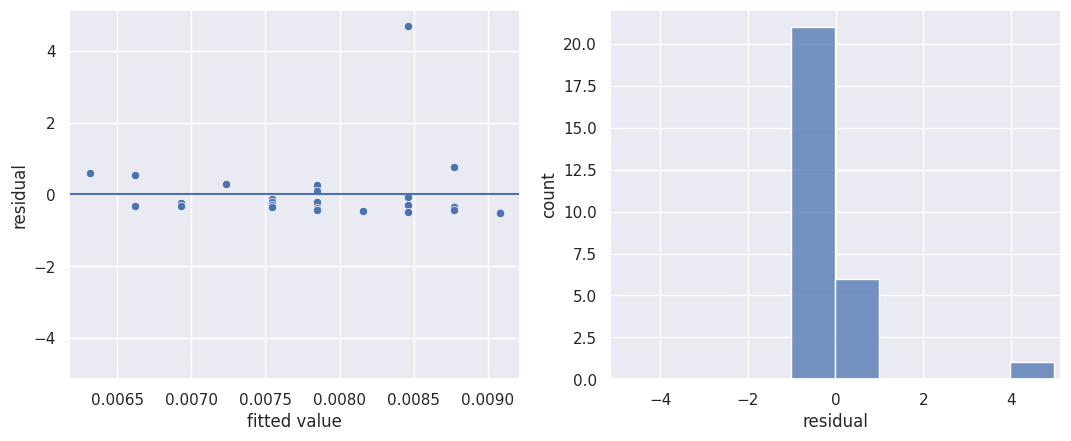

In [74]:
result_hip3_sem_rec.plot_residuals()


## Hipóteses 4: Desenvolvimento tem relação com vazão de pessoas

### C : EXT: DSV, CORE, CONP

#### Explicação:

Essa hipótese correlaciona o desenvolvimento socioeconômico do país (medido pelo IDH) com a vazão de pessoas. Ou seja, quanto menor for o desenvolvimento de uma nação, maior é a sua saída de pessoas, uma vez que, visando melhores condições de vida ou a própria sobrevivência, pessoas podem sair de um país, devido ao seu baixo desenvolvimento, em maior quantidade do que em países com um IDH alto. Além disso, a saída de pessoas também está correlacionada com o coreness e a contenção populacional (variáveis de controle), uma vez que quanto maior a vazão de pessoas, mais ao centro esse país está e menor é a sua contenção populacional.

#### Recorte: Países da União Europeia (UE) e da América Anglo-saxônica

Esse recorte foi pensado pois, ao tratarmos dos países da UE e da América Anglo-Saxônica, a saída de pessoas foi onde mais se alterou com o passar dos anos durante o século 21, além de ter seu IDH variando durante épocas de crise e pandemias durante esses anos de 2000 a 2016, o que pode resultar em países com alto IDH e, mesmo assim, uma alta vazão de pessoas, deixando de corroborar com a hipótese 4.

In [79]:
df_sem_rec_out = df_sem_rec.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_sem_rec_out.sort_values("value", ascending = False)
df_sem_rec_out

/tmp/ipykernel_12/1617968471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sem_rec_out = df_sem_rec.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value
origin,
American Samoa,0.0
Romania,2478.0
Holy See (the),0.0
Austria,5.0
Poland,817.0
...,...
Djibouti,1780.0
Montenegro,225.0
Luxembourg,0.0


In [80]:
g5 = gt_load('/grafo_sem_rec_ue.net.gz')

In [81]:
m = gt_draw.sfdp_layout(g5)
gt_move(g5, m)
gt_save(g5, 'grafo_sem_rec_ue.net.gz')

In [82]:
r5 = netpixi.render('grafo_sem_rec_ue.net.gz', infinite=True);

In [83]:
r5.vertex_set_key('nome')
r5.vertex_default(color=0xffffff)
# mudar a cor, a espessura e a curvatura das arestas
r5.edge_default(color=0x20B2AA)

In [84]:
r5.edge_scale('aceitos', 1, 10)

In [85]:
g5 =  gt_load('/grafo_sem_rec_ue.net.gz')

In [86]:
m = gt_draw.sfdp_layout(g5)
gt_move(g5, m)
gt_save(g5, 'centralidadeCorenessSemRecAno.net.gz')

In [99]:
r5 = netpixi.render('centralidadeCorenessSemRecAno.net.gz')

In [88]:
matrix = spectral.adjacency(g5)

# # Além de cpnet.Surprise, há outras
# # opções de algoritmos discretos:
# # cpnet.BE
# # cpnet.Lip
# # cpnet.LapCore
# # cpnet.LapSgnCore
# # cpnet.LowRankCore

algorithm = cpnet.BE()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# # Depois do código acima, c é um dicionário
# # em que as chaves são índices de vértices e
# # valores são os atribuídos pelo algoritmo.

g5.add_vp('coreness')
for i, coreness in c.items():
    v = g5.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
# # Vamos pintar de vermelho todos os vértices
# # identificados como centro e de verde todos
# # os vértices identificados como periferia.
    
for v in g5.all_vertices():
    if v['coreness'] == 1:
        r5.vertex(v['id'], color=0xff0000)
    else:
        r5.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [89]:
r5.edge_scale('aceitos', 1, 10)
r5.vertex_set_key('nome')
r5.vertex_scale('coreness', 5, 25)

In [90]:
df_coreness_sem_rec_ano = gt_data(g5).sort_values("coreness", ascending = False)
df_coreness_sem_rec_ano

,nome,coreness
id,,
China,China,1
Uruguay,Uruguay,1
Croatia,Croatia,1
Kenya,Kenya,1
Trinidad and Tobago,Trinidad and Tobago,1
...,...,...
United Arab Emirates,United Arab Emirates,0
Marshall Islands,Marshall Islands,0
Wallis and Futuna Islands,Wallis and Futuna Islands,0


In [91]:
r5.vertex_set_key('nome')
r5.vertex_default(color=0xffffff)
# mudar a cor, a espessura e a curvatura das arestas
r5.edge_default(color=0x20B2AA)

In [92]:
r5.edge_scale('aceitos', 1, 10)

In [93]:
data_idh_sem_rec = data.loc[:, ['idh_avg', 'country', 'pop_cont']]

data_idh_sem_rec = data_idh_sem_rec.rename(columns={'idh_2008_2012': 'idh_2008_2012', 'country': 'origin'})
df_coreness_sem_rec_ano = df_coreness_sem_rec_ano.rename(columns={'nome':'origin'})

df_coreness_sem_rec_ano

,origin,coreness
id,,
China,China,1
Uruguay,Uruguay,1
Croatia,Croatia,1
Kenya,Kenya,1
Trinidad and Tobago,Trinidad and Tobago,1
...,...,...
United Arab Emirates,United Arab Emirates,0
Marshall Islands,Marshall Islands,0
Wallis and Futuna Islands,Wallis and Futuna Islands,0


In [94]:
df_intermediario_sem_rec = df_coreness_sem_rec_ano.merge(data_idh_sem_rec, on="origin", how="left")
df_intermediario_sem_rec = df_intermediario_sem_rec.merge(df_sem_rec_out, on="origin", how="left")
df_intermediario_sem_rec

,origin,coreness,idh_avg,pop_cont,value
0,China,1,0.671941,0,122284.0
1,Uruguay,1,0.774059,0,143.0
2,Croatia,1,0.805706,0,718.0
3,Kenya,1,0.528059,0,8382.0
4,Trinidad and Tobago,1,0.764588,0,405.0
...,...,...,...,...,...
220,United Arab Emirates,0,0.819412,1,120.0
221,Marshall Islands,0,0.000000,0,3.0
222,Wallis and Futuna Islands,0,0.763000,0,0.0
223,Chad,0,0.350412,0,6545.0


In [95]:
df_filtrado_idh_sem_rec_ano = df_intermediario_sem_rec[(df_intermediario_sem_rec['origin'].isin(lista_paises_eu_america))]
df_filtrado_idh_sem_rec_ano

,origin,coreness,idh_avg,pop_cont,value
5,Estonia,1,0.841706,0,375.0
8,Romania,1,0.780118,0,2478.0
11,Malta,1,0.840176,0,4.0
22,Portugal,1,0.822059,0,26.0
24,Bulgaria,1,0.773059,0,1943.0
28,Slovenia,1,0.875706,0,28.0
30,France,1,0.873235,0,58.0
35,Hungary,1,0.816353,0,3697.0
54,Spain,1,0.863412,0,28.0
55,Latvia,1,0.812176,0,290.0


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_idh_sem_rec_ano, correlacionando o valor da saída de pessoas com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (value) é um valor contínuo.

In [96]:
result_hip4_sem_rec = reg.linear(data=df_filtrado_idh_sem_rec_ano, formula='np.log1p(value) ~ idh_avg + coreness + pop_cont')
result_hip4_sem_rec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log1p(value)   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     10.32
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           0.000539
Time:                        05:30:14   Log-Likelihood:                -52.050
No. Observations:                  28   AIC:                             110.1
Df Residuals:                      25   BIC:                             114.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8497      3.235      4.900      0.000       9.188      22.511
idh_avg      -31.9796      7.493     -4.268      0.000     -47.412     -16.547
coreness      15.8497      3.235      4.900      0.000       9.188      22.511
pop_cont       2.4180      1.674      1.444      0.161      -1.030       5.866
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.507
Skew:                          -0.562   Prob(JB):                        0.471
Kurtosis:                       2.827   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.79e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
result_hip4_sem_rec.nano_summary()

-31.980 (7.493) ***
+15.850 (3.235) ***
+02.418 (1.674)


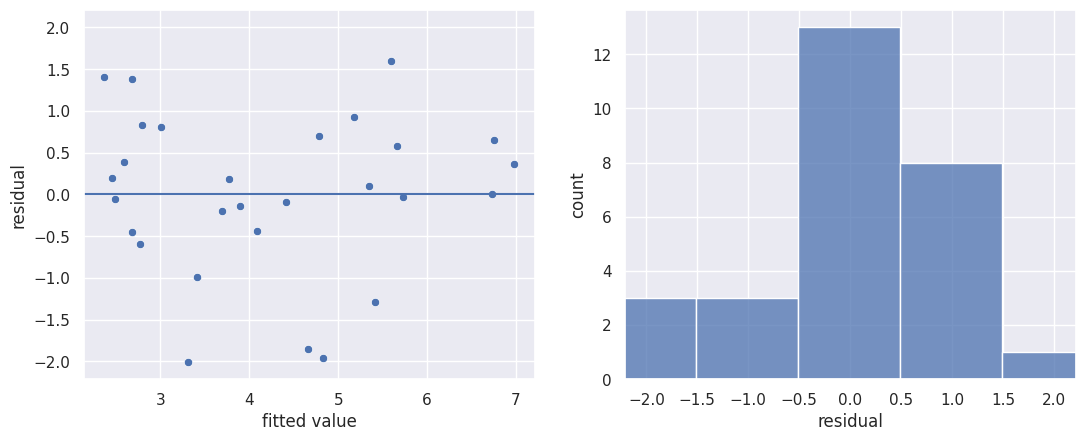

In [98]:
result_hip4_sem_rec.plot_residuals()


# Anos de 2008 a 2012

## Sem recortes de países

-------------------------------------------------------------------------------------------------------------------------------


## Hipóteses 4: Desenvolvimento tem relação com vazão de pessoas

### C : EXT: DSV, CORE, CONP

#### Explicação:

Essa hipótese correlaciona o desenvolvimento socioeconômico do país (medido pelo IDH) com a vazão de pessoas. Ou seja, quanto menor for o desenvolvimento de uma nação, maior é a sua saída de pessoas, uma vez que, visando melhores condições de vida ou a própria sobrevivência, pessoas podem sair de um país, devido ao seu baixo desenvolvimento, em maior quantidade do que em países com um IDH alto. Além disso, a saída de pessoas também está correlacionada com o coreness e a contenção populacional (variáveis de controle), uma vez que quanto maior a vazão de pessoas, mais ao centro esse país está e menor é a sua contenção populacional.

#### Recorte: Países da União Europeia (UE) e da América Anglo-saxônica

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, com a crise imobiliária dos EUA em 2008 que resultou em uma crise mundial, diversos países por todo o globo foram afetados e, com isso, a saída de pessoas pode ter sido muito afetada em países com alto IDH, podendo resultar em uma alta vazão de pessoas desses países, o que deixaria de corroborar com a hipótese 4.

In [192]:
df_soano = df_intermediario
df_soano

,country,coreness,idh_2008_2012,pop_cont,out_degree,in_degree,rejected
0,Denmark,1,0.9218,0,0.0,3685.0,10179.0
1,Ecuador,1,0.7290,0,163.0,31987.0,38839.0
2,Spain,1,0.8718,0,16.0,1137.0,11965.0
3,Sweden,1,0.9098,0,9.0,13548.0,139848.0
4,Switzerland,1,0.9372,0,2.0,14535.0,18415.0
...,...,...,...,...,...,...,...
220,United Rep. of Tanzania,0,0.4806,0,225.0,162.0,27.0
221,Svalbard and Jan Mayen,0,0.0000,0,0.0,0.0,0.0
222,Russian Federation,0,0.7834,1,20428.0,2182.0,13537.0
223,Lebanon,0,0.7628,1,1068.0,1331.0,2119.0


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_soano, correlacionando o valor da saída de pessoas com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (value) é um valor contínuo.

In [194]:
result_hip4_so_ano = reg.linear(data=df_soano, formula='np.log1p(out_degree) ~ idh_2008_2012 + coreness + pop_cont')
result_hip4_so_ano.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log1p(out_degree)   R-squared:                       0.121
Model:                              OLS   Adj. R-squared:                  0.110
Method:                   Least Squares   F-statistic:                     10.19
Date:                  Sun, 20 Nov 2022   Prob (F-statistic):           2.60e-06
Time:                          05:45:57   Log-Likelihood:                -565.96
No. Observations:                   225   AIC:                             1140.
Df Residuals:                       221   BIC:                             1154.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.5358      0.631     10.356      0.000       5.292       7.780
idh_2008_2012    -2.9657      0.940     -3.154      0.002      -4.819      -1.113
coreness         -1.4661      0.751     -1.953      0.052      -2.945       0.013
pop_cont          2.6116      0.772      3.383      0.001       1.090       4.133
==============================================================================
Omnibus:                        8.945   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                5.067
Skew:                          -0.172   Prob(JB):                       0.0794
Kurtosis:                       2.350   Cond. No.                         6.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
result_hip4_so_ano.nano_summary()

-2.966 (0.940) ***
-1.466 (0.751) *
+2.612 (0.772) ***


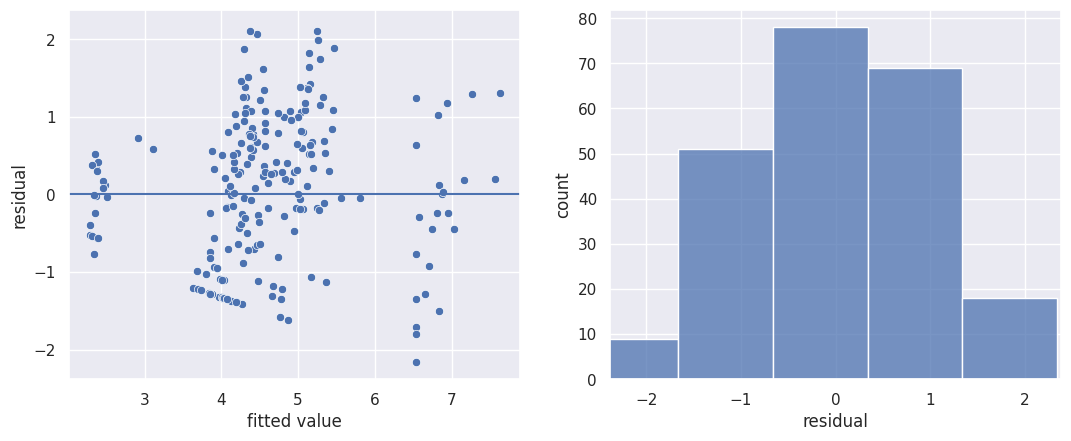

In [196]:
result_hip4_so_ano.plot_residuals()


## Hipóteses 5: Abertura tem relação com chegada de pessoas

### H : IN: OPEN, EXT, CORE

#### Explicação:

Essa hipótese correlaciona a abertura de um país com a entrada de pessoas. Ou seja, quanto maior for a abertura de um país, mais pessoas chegam até ele. Ou seja, quanto mais fácil for de entrar nas fronteiras de uma nação, maior será o número de pessoas capazes de buscar refúgio nesses países. Além disso, a chegada de pessoas também está relacionada com a saída de pessoas e o coreness (variáveis de controle), uma vez que quanto maior a saída de pessoas de um país, mais pessoas chegarão em outros países, além de que quanto maior a entrada de pessoas, maior é o seu coreness. 


#### Recorte: 2008 a 2012

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na abertura de países que foram mais afetados geopoliticamente com essas crises, chegando a uma menor abertura desses países, já que houve uma maior restrição na entrada de pessoas por conta do aumento do risco de contaminação da H1N1 e por também não estarem em condições financeiras favoráveis a entrada de ainda mais pessoas em seu território.

In [198]:
df_so_ano_inout = df_2008_2012_inout
df_so_ano_inout

,country,coreness,out_degree,in_degree,rejected,open
0,Denmark,1,0.0,3685.0,10179.0,26.579631
1,Ecuador,1,163.0,31987.0,38839.0,45.162793
2,Spain,1,16.0,1137.0,11965.0,8.678064
3,Sweden,1,9.0,13548.0,139848.0,8.832043
4,Switzerland,1,2.0,14535.0,18415.0,44.112291
...,...,...,...,...,...,...
220,United Rep. of Tanzania,0,225.0,162.0,27.0,85.714286
221,Svalbard and Jan Mayen,0,0.0,0.0,0.0,0.000000
222,Russian Federation,0,20428.0,2182.0,13537.0,13.881290
223,Lebanon,0,1068.0,1331.0,2119.0,38.579710


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_so_ano_inout, correlacionando o valor do in_degree com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (in_degree) é um valor contínuo (métrica).

In [199]:
result_hip5_so_ano = reg.linear(data=df_2008_2012_inout_eu_america, formula='np.log1p(in_degree) ~ open + coreness + out_degree')
result_hip5_so_ano.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(in_degree)   R-squared:                       0.722
Model:                             OLS   Adj. R-squared:                  0.687
Method:                  Least Squares   F-statistic:                     20.74
Date:                 Sun, 20 Nov 2022   Prob (F-statistic):           7.52e-07
Time:                         05:50:18   Log-Likelihood:                -46.129
No. Observations:                   28   AIC:                             100.3
Df Residuals:                       24   BIC:                             105.6
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3242      0.526      8.226      0.000       3.239       5.409
open           0.0483      0.020      2.402      0.024       0.007       0.090
coreness       3.6927      0.596      6.200      0.000       2.464       4.922
out_degree     0.0019      0.002      1.001      0.327      -0.002       0.006
==============================================================================
Omnibus:                        3.944   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.739
Skew:                          -0.243   Prob(JB):                        0.419
Kurtosis:                       1.880   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
result_hip5_so_ano.nano_summary()

+0.048 (0.020) **
+3.693 (0.596) ***
+0.002 (0.002)


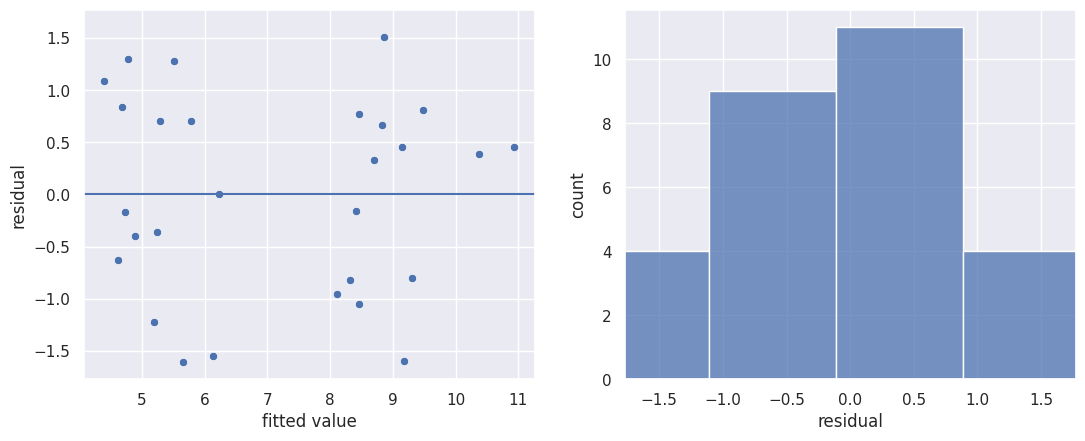

In [201]:
result_hip5_so_ano.plot_residuals()